# Übung 03 : Stochastische Grundlagen

Wie üblich importieren wir zuerst unsere Standardbibliotheken

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1: Korrelation
Lade die als *.npy* gespeicherten Bilder *'tower'*, *'hands'*, *'tower_noisy'*.

Plotte die Bilder.

In der Vorlesung haben wir die Korrelation zweier Signale behandelt. Berechne zur Übung die Korrelationsfunktion (unzentrierte Kovarianz) zwischen *'tower_noisy'* und den anderen Bildern sowie einem Rauschbild mit gleichverteiltem Rauschen auf allen Kanälen. Was stellst du fest? Wie unterscheidet sich die normierte Kovarianz im Ergebnis? Berechne auch diese.

*Tipp:* Verwende gerne Standardbibliotheken zur Berechnung (scipy:correlate, openCV:match_template) oder eine eigene Implementierung (naiv implementiert erhöht die Laufzeit drastisch, die Ausgangsbilder sollten die gleiche Dimension wie die Eingänge haben!)

*Zusatz:* Nutze die Korrelation zur Berechnung einer einfachen Kantendetektion!

In [ ]:
from scipy.signal import correlate
from skimage.feature import match_template

# naive Implementierung der normalisierten Kreuzkorrelation
def normalized_correlation(img1,img2):
  '''
  img1: ndarray der Größe (ny,nx,3)
  img2: ndarray der Größe (nx,nx,3)
  '''
  r = np.zeros_like(img1)
  nx = img1.shape[1]
  ny = img1.shape[0]
  for x in range(nx):
    for y in range(ny):
      m1 = img1[int(max(0,0-ny/2+y+1)):int(min(ny,ny/2+y)),int(max(0,0-nx/2+x+1)):int(min(nx,nx/2+x)),:]
      m2 = img2[int(max(ny/2-y,0)):int(min(ny,ny-y+ny/2-1)),int(max(nx/2-x,0)):int(min(nx,nx-x+nx/2-1)),:]
      r[y,x]=np.mean((m1-m1.mean())*(m2-m2.mean()))
      stds = m1.std() * m2.std()
      if stds==0:
        r[y,x]=0
      else:
        r[y,x] /= stds
  return r






Ausschnitte `m`
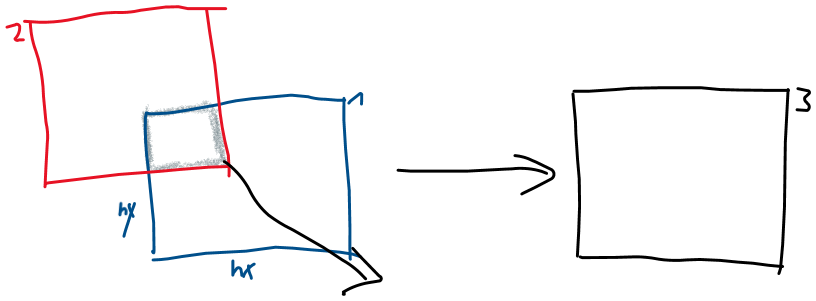

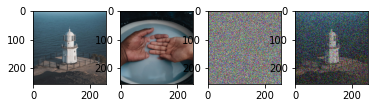

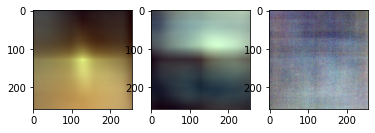

In [ ]:
tower = np.load('tower.npy')
tower_noisy = np.load('tower_noisy.npy')
hands = np.load('hands.npy')

noise = (np.random.random((256,256,3))*255).astype(int)


fig, axs = plt.subplots(1,4)
axs[0].imshow(tower)
axs[1].imshow(hands)
axs[2].imshow(noise)
axs[3].imshow(tower_noisy)

def min_max(sig):
  return (sig - sig.min())/(sig.max()-sig.min())

tower_gt = tower/255
tower_noisy_gt = tower_noisy/255
hands_gt = hands/255
noise_gt = noise/255



#c_t_t = correlate(tower_noisy_gt,tower_gt,mode='same')
c_t_t = match_template(tower_noisy_gt,tower_gt,pad_input=True)
c_t_t_p = min_max(c_t_t)
#c_t_h = correlate(tower_noisy_gt,hands_gt,mode='same')
c_t_h = match_template(tower_noisy_gt,hands_gt,pad_input=True)
c_t_h_p = min_max(c_t_h)
#c_t_n = correlate(tower_noisy_gt,noise_gt,mode='same')
c_t_n = match_template(tower_noisy_gt,noise_gt,pad_input=True)
c_t_n_p = min_max(c_t_n)


fig2, axs2 = plt.subplots(1,3)
axs2[0].imshow(c_t_t_p)
axs2[1].imshow(c_t_h_p)
axs2[2].imshow(c_t_n_p)




In [ ]:
print('normierte Kovarianz für Bild 1,2,3:', c_t_t.max(),c_t_h.max(),c_t_n.max())

print('Bild 1 Position:','y-max:',np.argmax(c_t_t[:,:,0])%256,'x-max:',np.argmax(c_t_t[:,:,0])//256)


normierte Kovarianz für Bild 1,2,3: 0.43952313607696397 0.3670655421957004 0.01094433642970989
Bild 1 Position: y-max: 128 x-max: 128


Beispiel:
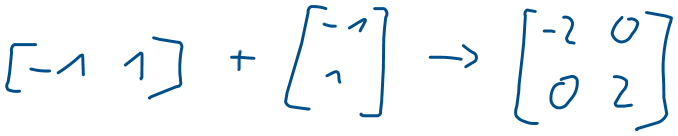

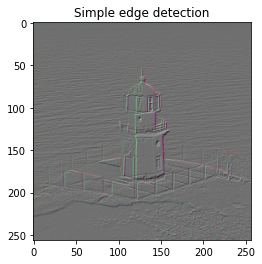

In [ ]:
template_edge = np.array((-2,0,0,2,-2,0,0,2,-2,0,0,2)).reshape(2,2,3)
edges = correlate(tower_gt,template_edge,mode='same')
edges_p = min_max(edges)
plt.figure()
plt.title('Simple edge detection')
plt.imshow(edges_p)

## Aufgabe 2: Naive Bayes Classifier

Reminder: Die Annahme beim Naive Bayes (NB) ist bedingte Unabhängikeit der Merkmale gegeben die Klasse. Der Vorteil, der sich daraus ergibt ist, dass wir nur skalare/univariate Verteilungsdichten schätzen müssen.

Ist diese Unabhängigkeit tatsächlich erfüllt?

Der Bayes Classifier (non-idiot Bayes) macht diese Annahme nicht. In dieser Übung wollen wir uns anschauen, welche Auswirkungen das auf das Klassifikationsergebnis hat.

Gegeben ist ein Datensatz aus zwei korrelierten Merkmalen und den zugehörigen Klassen (Datensatz b). Außerdem gibt es einen Datensatz a mit zwei unkorrelierten Merkmalen.
Vergleiche durch Plots und Berechnung der Klassifikationsergebnisse für Testdaten die beiden Klassifier (NB und non-idiot Bayes). Ihr dürft annehmen, dass die Merkmale einer Gaussverteilung folgen.

*Zusatz:* Reduziere die Menge der Trainingsdaten, wie verhalten sich die beiden Classifier? Erstelle eigene Trainingsdaten mit größerer Feature-Anzahl, was beobachtest du?



In [ ]:
# Vorlesungsbeispiel.
from scipy.stats import norm

x_men = np.array((1.83,81.65,12,1.8,86.18,11,1.7,77.11,12,1.8,74.84,10)).reshape(4,3)
x_women = np.array((1.52,45.36,6,1.68,68.04,8,1.65,58.97,7,1.75,68.04,9)).reshape(4,3)
x_test = np.array((1.83,58.97,8)).reshape(1,3)

mu_men = x_men.mean(0)
sig_men = x_men.std(0,ddof=1)
mu_women = x_women.mean(0)
sig_women = x_women.std(0,ddof=1)

p_men = x_men.shape[0]/(x_women.shape[0]+x_men.shape[0])
p_women = 1-p_men

for i in range(x_men.shape[1]):
  p_men = p_men*norm.pdf(x_test[0,i],loc=mu_men[i],scale=sig_men[i])
  p_women = p_women*norm.pdf(x_test[0,i],loc=mu_women[i],scale=sig_women[i])

print('naiver Bayes')
print('P(X=W)=',p_women)
print('P(X=M)=',p_men)

from scipy.stats import multivariate_normal
cov_men = np.cov(x_men.T)
#cov_men = np.eye(x_men.shape[1])*sig_men**2 #entspricht naivem Bayes
cov_women = np.cov(x_women.T)
#cov_women = np.eye(x_women.shape[1])*sig_women**2
p_men_CHA = x_men.shape[0]/(x_women.shape[0]+x_men.shape[0])
p_women_CHA = 1-p_men_CHA
p_men_CHA = p_men_CHA* multivariate_normal.pdf(x_test,mu_men,cov_men)
p_women_CHA = p_women_CHA * multivariate_normal.pdf(x_test,mu_women,cov_women)

print('Normaler Bayes')
print('P(X=W)=',p_women_CHA)
print('P(X=M)=',p_men_CHA)

naiver Bayes
P(X=W)= 0.003827951316013193
P(X=M)= 4.30286245429528e-08
Normaler Bayes
P(X=W)= 2.630720276346217e-15
P(X=M)= 3.433912662213761e-07


## Wie wurden die Daten erzeugt?

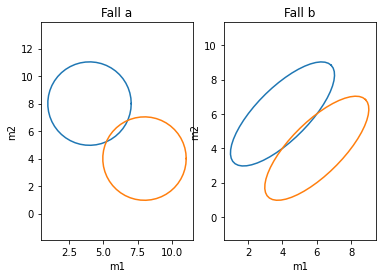

## Lösung

Text(0.5, 1.0, 'Datensatz b')

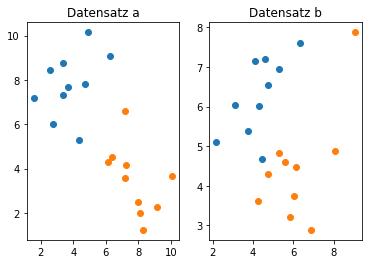

In [ ]:
# Lade und plotte die Daten
# Wir haben zwei Datensätze (a und b) aus unterschiedlichen Verteilungen, in denen jeweils zwei Klassen exisitieren

with np.load('data_bayes_clas.npz') as data:
  class1_a = data['class1_a']
  class2_a = data['class2_a']
  class1_a_test = data['class1_a_test'] # Unser Testdatum, von dem wir wissen, dass es zu Klasse 1 gehört
  class1_b = data['class1_b']
  class2_b = data['class2_b']
  class1_b_test = data['class1_b_test'] # Unser Testdatum, von dem wir wissen, dass es zu Klasse 1 gehört

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(class1_a[0,:],class1_a[1,:],'o')
ax1.plot(class2_a[0,:],class2_a[1,:],'o')
ax1.set_title('Datensatz a')
ax2.plot(class1_b[0,:],class1_b[1,:],'o')
ax2.plot(class2_b[0,:],class2_b[1,:],'o')
ax2.set_title('Datensatz b')

In [ ]:
# naiver Bayes Classifier, gibt Wahrscheinlichkeiten (oder logprobs) zurück für jede Klasse, man kann arg Maximum davon nehmen
def naive_bayes_classifier(train_data,test_data,is_log=False):
  '''
  train_data = Tuple[np.ndarray] : (features,samples)
  test_data = np.ndarray : (features,samples)
  '''
  n_features = train_data[0].shape[0]
  mus = list()
  sigmas = list()
  p_class = list()
  n_samples = sum([i.shape[1] for i in train_data])
  for c,data in enumerate(train_data):
    mus.append(data.mean(1))
    sigmas.append(data.std(1,ddof=1))
    if is_log:
      p_class.append(np.log(data.shape[1]/n_samples))
    else:
      p_class.append(data.shape[1]/n_samples)
  for c in range(len(train_data)):
    for i in range(n_features):
      if is_log:
        p_class[c] = p_class[c]+norm.logpdf(test_data[i,:],loc=mus[c][i],scale=sigmas[c][i])
      else:
      	p_class[c] = p_class[c]*norm.pdf(test_data[i,:],loc=mus[c][i],scale=sigmas[c][i])

  return tuple(p_class)

# Bayes Classifier, gibt Wahrscheinlichkeiten (oder logprobs) zurück für jede Klasse, man kann arg Maximum davon nehmen
def bayes_classifier(train_data,test_data,is_log=False):
  '''
  train_data = Tuple[np.ndarray] : (features,samples)
  test_data = np.ndarray : (features,samples)
  '''
  n_features = train_data[0].shape[0]
  mus = list()
  sigmas = list()
  p_class = list()
  n_samples = sum([i.shape[1] for i in train_data])
  for c,data in enumerate(train_data):
    mus.append(data.mean(1))
    sigmas.append(np.cov(data))
    if is_log:
      p_class.append(np.log(data.shape[1]/n_samples))
    else:
      p_class.append(data.shape[1]/n_samples)
  for c in range(len(train_data)):
    if is_log:
      p_class[c] = p_class[c]+multivariate_normal.logpdf(test_data.T,mus[c],sigmas[c])
    else:
      p_class[c] = p_class[c]*multivariate_normal.pdf(test_data.T,mus[c],sigmas[c])

  return tuple(p_class)


# Teste auf Vorlesungsbeispiel
class_probs_naive = naive_bayes_classifier((x_men.T,x_women.T),x_test.T)
print(class_probs_naive)
class_probs_naive_log = naive_bayes_classifier((x_men.T,x_women.T),x_test.T,True)
print([np.exp(i) for i in class_probs_naive_log])
class_probs_nidiot = bayes_classifier((x_men.T,x_women.T),x_test.T)
print(class_probs_nidiot)
class_probs_nidiot_log = bayes_classifier((x_men.T,x_women.T),x_test.T,True)
print([np.exp(i) for i in class_probs_nidiot_log])

(array([4.30286245e-08]), array([0.00382795]))
[array([4.30286245e-08]), array([0.00382795])]
(3.433912662213761e-07, 2.630720276346217e-15)
[3.433912662213761e-07, 2.6307202763462123e-15]


Der Vergleich des naiven Bayes mit dem "normalen" Bayes verdeutlicht die Schwächen der Annahme. Tatsächlich ist es allerdings so, dass der naive Bayes sehr gut in der Realität funktioniert. Scheinbar ist es so, dass sich oft die Effekte der Korrelation in den Daten herausmitteln. Von Vorteil ist auch, dass der naive Bayes wesentlich weniger Parameter benötigt und dadurch robuster ist.

In [ ]:
# Lösung der Übungsaufgabe

print('naive a:', naive_bayes_classifier((class1_a,class2_a),class1_a_test))
print('not naive a:', bayes_classifier((class1_a,class2_a),class1_a_test))
print('naive b', naive_bayes_classifier((class1_b,class2_b),class1_b_test))
print('not naive b:', bayes_classifier((class1_b,class2_b),class1_b_test))

naive a: (array([0.02435865]), array([3.28585726e-05]))
not naive a: (0.02772523838914254, 0.0003105652921484836)
naive b (array([0.0006835]), array([0.00106197]))
not naive b: (0.003973942337435293, 0.0004722176280328978)


## Aufgabe 3: Zentraler Grenzwertsatz

Die Wahrscheinlichkeit im Laufe des Lebens an Lungenkrebs zu erkranken beträgt für Frauen in den USA 6%. Pro Tag werden etwa 5000 weibliche Babys auf die Welt gebracht. Wie sieht die Wahrscheinlichkeitsverteilung aus, wenn wir betrachten wollen, wieviele der  am heutigen Tag geborenen Frauen im Laufe ihres Lebens an Lungenkrebs erkranken werden?


a) Simuliere die Häufigkeit, wobei du jede Person berücksichtigst. Plotte das Histogramm.

b) Was sagt der Zentrale Grenzwertsatz aus? Können wir das Ergebnis durch eine parametrierte Funktion annähern? Wie lassen sich die Parameter berechnen?

Quelle https://de.statista.com/statistik/daten/studie/457384/umfrage/usa-wahrscheinlichkeit-der-entwicklung-von-lungenkrebs/


*Lösung b):*

   Reminder: $E(X+Y) = E(X)+E(Y), Var(X+Y)=Var(X) + Var(Y)$, falls $X,Y$ unabhängig

  Wir führen neue Zufallsvariable ein : $ S = X_1 + X_2 +X_3 + .. .$ (Alle Babies)

 Berechne $E(S)$: $E(X) = \sum_i x_iP(X=x_i) = p \rightarrow E(S) = N \cdot p$

Berechne $Var(S)$:  $Var(X) = \sum_i(x_i-\mu)^2P(X=x_i) = (0-p)^2(1-p)+(1-p)^2p=(1-p)p \rightarrow Var(S) = N \cdot (1-p)p$






mu= 300.0 mean= 299.8693333333333
sigma= 16.792855623746664 std= 16.675958967631733


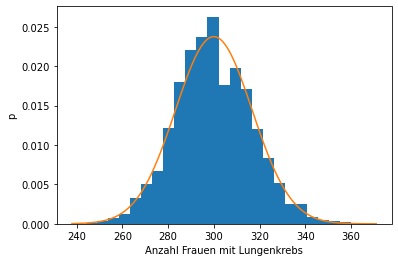

In [ ]:
from scipy.stats import norm

p = 0.06
n_frauen = 5000
n_samples = 6000
sampNaiv = (np.random.random((int(n_frauen),n_samples))<p).sum(0)
plt.hist(sampNaiv,bins=25,density=True)
plt.ylabel('p')
plt.xlabel('Anzahl Frauen mit Lungenkrebs')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = n_frauen * p ;
sigma = np.sqrt(n_frauen * p * (1-p)) ;
distr_f = norm.pdf(x,loc=mu,scale=sigma)
plt.plot(x,distr_f)


print('mu=',mu,'mean=',sampNaiv.mean())
print('sigma=',sigma,'std=', sampNaiv.std(ddof=1)) # required in numpy to get true sample standard deviation and correct bias (devide by (N-1))